<a href="https://colab.research.google.com/github/itan-s/Prediction-of-Product-Sales/blob/main/Prediction-of-Product-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

Kristan Bryan Simbulan

## Overview

This task is a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

The dataset to be used is sourced from the **Big Mart Sales Practice Problem** at Analytics Vidhya. Original Data Source: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


The dataset dictionary is as follows:

* ***Item_Identifier*** -	Product ID

* ***Item_Weight***	- Weight of product

* ***Item_Fat_Content*** - Whether the product is low-fat or regular

* ***Item_Visibility***	- The percentage of total display area of all products in a store allocated to the particular product

* ***Item_Type*** -	The category to which the product belongs

* ***Item_MRP***	- Maximum Retail Price (list price) of the product

* ***Outlet_Identifier***	- Store ID

* ***Outlet_Establishment_Year***	- The year in which store was established

* ***Outlet_Size***	- The size of the store in terms of ground area covered

* ***Outlet_Location_Type***	- The type of area in which the store is located

* ***Outlet_Type***	- Whether the outlet is a grocery store or some sort of supermarket

* ***Item_Outlet_Sales***	- Sales of the product in the particular store. **This is the target variable to be predicted**.

## Part 1: Analysis of the Dataset

### Loading and Initial Inspection of Data

In [372]:
# Import the necessary libraries for data analysis
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
# Save the url of the dataset file into the variable 'url'
url = "https://docs.google.com/spreadsheets/d/1Zj82l4J1kS8rkFu95Q3F0L2XymcqM75aSIDxtdLQnNo/edit#gid=1119319421"

# Change the format of the url into an export url and save it to variable 'csv_url'
# Source: https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
csv_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

# Download the dataset in csv format and save to pandas dataframe, df.
df = pd.read_csv(csv_url)

In [374]:
# Check the columns, their respective data types, and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [375]:
# Change the datatype of Outlet_Establishment_Year column to object
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('string')
# Confirm the datatype
df['Outlet_Establishment_Year'].dtype

string[python]

In [376]:
# Acquire the maximum number of columns set for pandas dataframe
pd.get_option('display.max_columns')

# Set the maximum number of columns for pandas dataframe to 50
pd.set_option('display.max_columns', 50)

In [377]:
# Acquire the maximum number of columns set for pandas dataframe
pd.get_option('display.max_rows')

# Set the maximum number of columns for pandas dataframe to 50
pd.set_option('display.max_columns', 9000)

In [378]:
# Check the first five lines of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


SUMMARY:  

*   There are 8523 entries (rows) and 12 features (columns).
*   **Item_Outlet_Sales** is the target feature.
*   All columns have correctly assigned data types, except for the establishment year, which needs to be converted from integer to string.
*   No columns were dropped as all of them are useful in the succeeding analysis.

### Data preparation




#### Check for duplicated rows


In [379]:
# Identify the duplicated rows and find their total number
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

SUMMARY:

No duplicate rows present in the dataframe

#### Check Unique Identifiers

In [380]:
# Find the numnber of unique values per column/feature
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [381]:
# Find the percentage of unique values per column/feature
df.nunique()/len(df) *100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

SUMMARY:

No valid unique identifier can be set as an index

#### Identify and Impute Missing Values

In [382]:
# Get the number of null values for all columns
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [383]:
#  Get the percentage of null values for all columns
null_sums/len(df) *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

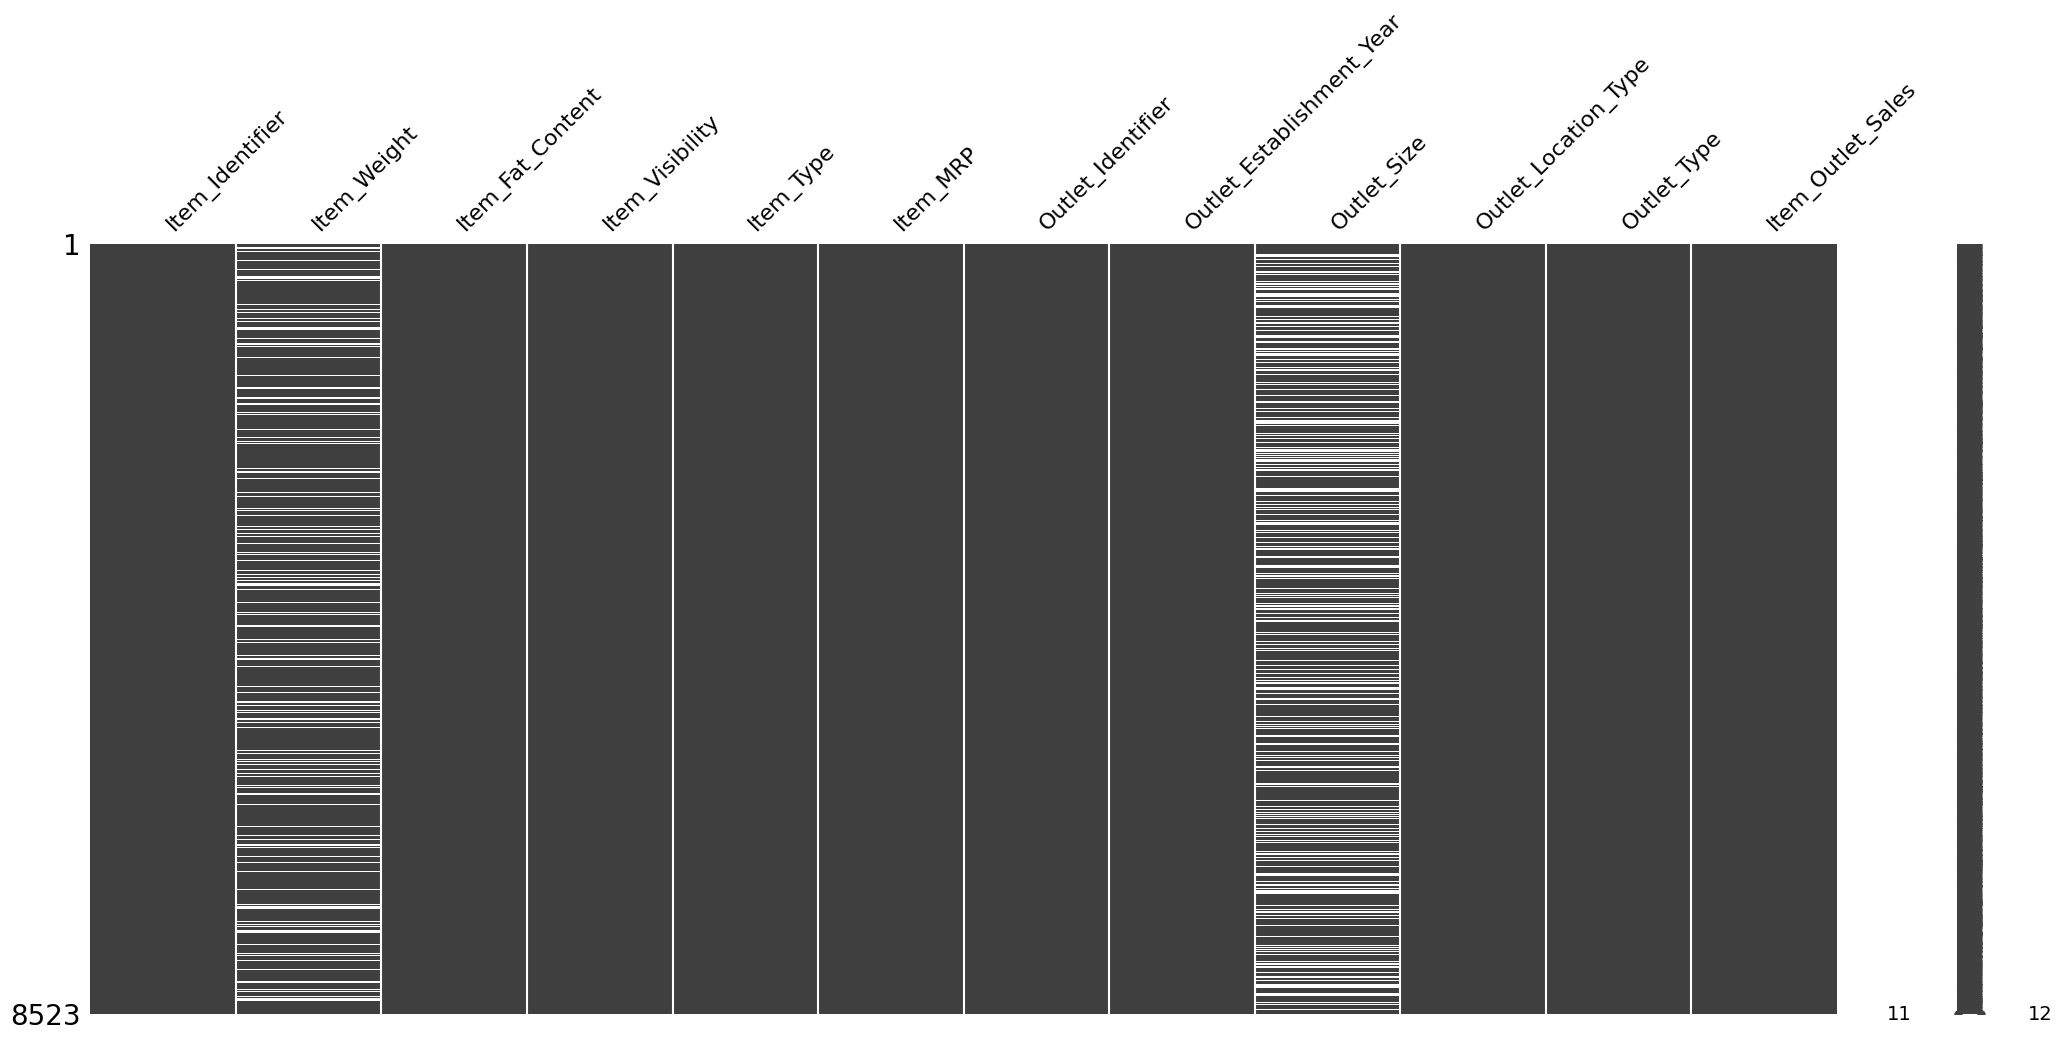

In [384]:
# Visualization of the missing values
msno.matrix(df);

Replace missing values in categorical columns with "MISSING"

In [385]:
# Create a list of categorical column names
cat_columns = df.select_dtypes('object').columns

# Use the list of categorical columns to fill null values with MISSING
df[cat_columns] = df[cat_columns].fillna('MISSING')

# Confirm nulls in categorical columns are replaced successfully
df[cat_columns].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

Note: Null values in the categorical variable 'Outlet_Size' are successfully replaced with 'MISSING'.

Replace missing values in numerical columns with -1

In [386]:
# Create a list of numeric column names
num_columns = df.select_dtypes('number').columns

# Use the list of numerical columns to fill null values with -1
df[num_columns] = df[num_columns].fillna(-1)

# Confirm nulls in numerical columns are replaced successfully
df[num_columns].isna().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

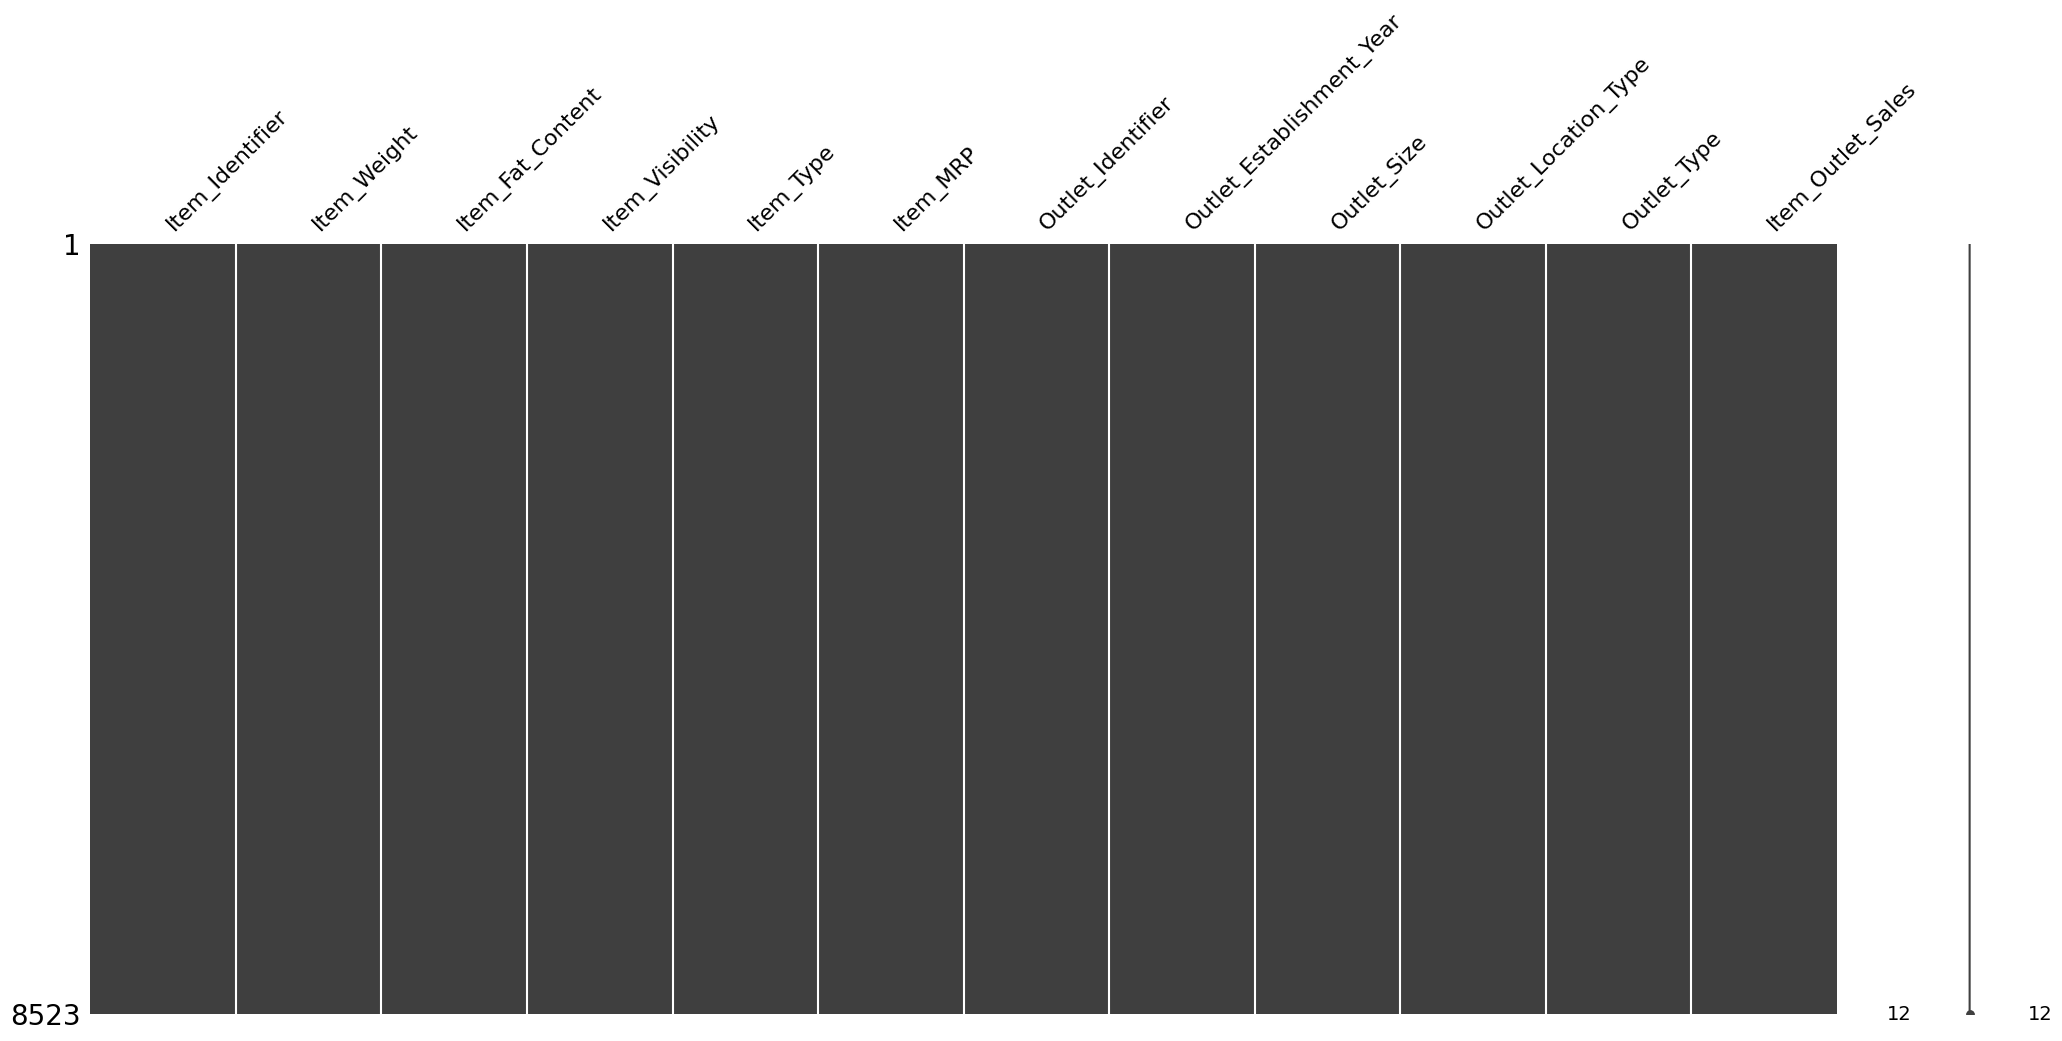

In [387]:
# Recheck visualization of the missing values to reconfirm absence of missing values
msno.matrix(df);

SUMMARY:

All missing values are imputed accordingly.

#### Check and Fix Consistency

In [388]:
# Save a list of string columns
obj_columns = df.select_dtypes(['object', 'string']).columns

# Check the # of unique values for the string columns
df[obj_columns].nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

Note: Will not check the Item_identifier for consistency since it is not possible to know if the identifier is indeed consistent due to its many possible values.

In [389]:
# Save to a variable the list of all the columns that will be checked for consistency
obj_columns = df.select_dtypes(['object', 'string']).drop(columns = 'Item_Identifier').columns

In [390]:
# loop through the list of string columns to check for value consistency
for col in obj_columns:
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: Int64


Medium     2793
MISSING 

Note: For the ***Item_Fat_Content*** column, the values should only be either 'Low Fat' or 'Regular'. Meanwhile, for the ***Outlet_Size*** column, values should either be Small, Medium, or Large.

In [391]:
# Replace miscoded entries in the Item_Fat_Content column with the expected values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [392]:
# Replace miscoded entries in the Outlet_Size column with the expected values
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
# Check the value counts again to confirm
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

SUMMARY:

The dataframe was checked for consistency. Certain columns are fixed to make their values consistent with the expectation.

### Exploratory Data Analysis (EDA)

#### Correlation of item outlet sales (target variable) with the numerical features in the dataset

In [393]:
# Get the correlation among columns and save it to a variable
corr = df.corr(numeric_only = True)

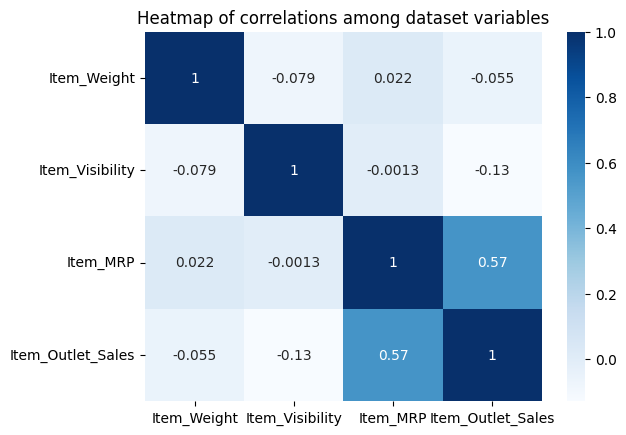

In [394]:
# Generate a heatmap of the numerical features (including the target variable)
ax1 = sns.heatmap(corr, cmap = 'Blues', annot = True);
ax1.set(title = 'Heatmap of correlations among dataset variables');

Observations:
* There is a moderate positive correlation between the Item_MRP and Item_Outlet_Sales with a correlation coefficient of 0.57.
* The positive relationship between the item MRP and outlet sales can be an expected result since a higher MRP may lead to higher outlet sales.
* Surprisingly, the visibility of the items in stores does not have a significant correlation with the outlet sales.

#### Distribution of the item outlet sales

In [395]:
# Generate the descriptive statistics from the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,2181.288914
std,6.720742,0.051598,62.275067,1706.499616
min,-1.000000,0.000000,31.290000,33.290000
25%,6.650000,0.026989,93.826500,834.247400
50%,11.000000,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


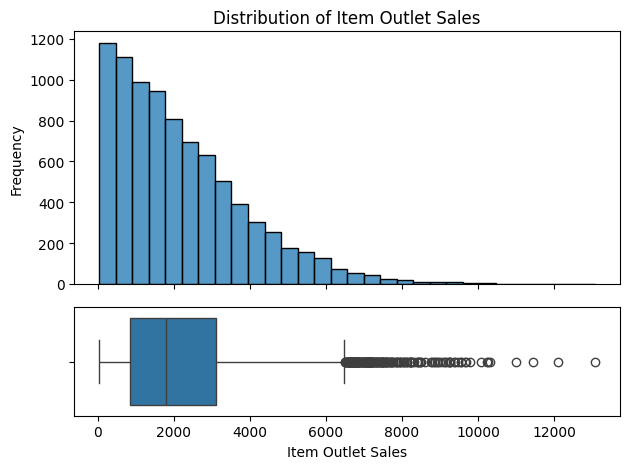

In [396]:
# Create a histogram and boxplot of Item_Outlet_Sales
gridspec = {"height_ratios":[0.7,0.3]}
fig, axes2 = plt.subplots(nrows = 2, gridspec_kw = gridspec, sharex = True)
sns.histplot(data = df, x = 'Item_Outlet_Sales', bins = 30, ax = axes2[0]);
sns.boxplot(data = df, x = 'Item_Outlet_Sales', ax = axes2[1])
axes2[0].set(title = 'Distribution of Item Outlet Sales', ylabel = 'Frequency');
axes2[1].set(xlabel = 'Item Outlet Sales');
fig.tight_layout()

<ipython-input-397-60655ef888b8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right');


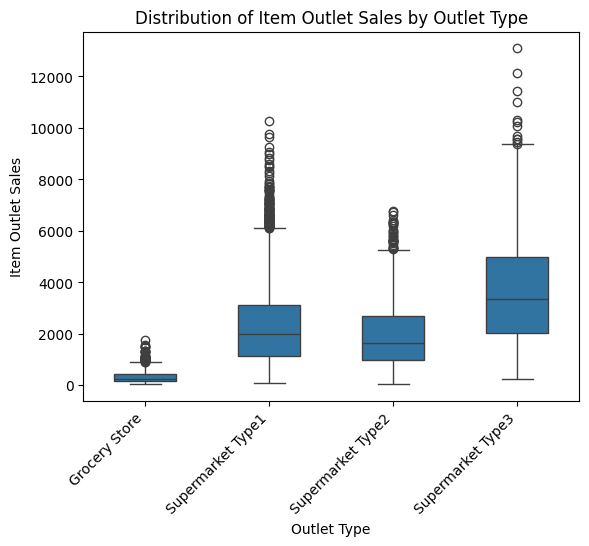

In [397]:
# Create a boxplot of the values of Item_Outlet_Sales per outlet type
ax3 = sns.boxplot(data = df, y = 'Item_Outlet_Sales', width = 0.5, x = 'Outlet_Type', order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right');
ax3.set(title = 'Distribution of Item Outlet Sales by Outlet Type', ylabel = 'Item Outlet Sales', xlabel = 'Outlet Type');

<ipython-input-398-314f997edd6c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right');


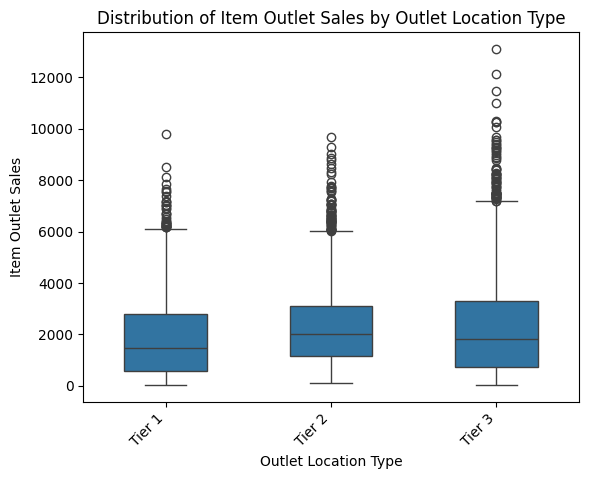

In [398]:
# Create a boxplot of the values of Item_Outlet_Sales per outlet location type
ax4 = sns.boxplot(data = df, y = 'Item_Outlet_Sales', width = 0.5, x = 'Outlet_Location_Type', order = ['Tier 1', 'Tier 2', 'Tier 3'])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right');
ax4.set(title = 'Distribution of Item Outlet Sales by Outlet Location Type', ylabel = 'Item Outlet Sales', xlabel = 'Outlet Location Type');

Observations:

* The mean item outlet sales in all stores is ~2181 currency units with a maximum of ~13,000 currency units and high variability.
* Overall, around 75% of item sales data were within the amount of < 5000 currency units across all the store types. See the graph of the **Distribution of Item Outlet Sales**.
* In detail, grocery stores have the lowest item sales figures (< 2000 units) with a median that is less than 1000 currency units. This may be because groceries are relatively smaller in size with probably limited items for sale compared to supermarkets. In contrast, supermarkets have higher item sales figures mostly, ranging from 0 to ~13,000 units. See the graph of the **Distribution of Item Outlet Sales by Outlet Type**.
* Meanwhile, the median of outlet item sales data in Supermarket Type 3 is higher compared to both Type 1 and Type 2. This means that sales amount per item in Type 3 supermarkets have relatively larger values, though this does not necessarily mean that Type 3 have the highest total sales. Total sales looks into the sum of the sales of all items in each store type, which will give more advantage to store types in which larger variety of items are being sold. See the graph of the **Distribution of Item Outlet Sales by Outlet Type**.
* Supermarkets located at Tier 3 locations have the highest item sales (> 10,000 currency units). Nevertheless, the distribution of outlet item sales data is almost similar among different store location tiers. See the **Distribution of Item Outlet Sales by Outlet Location Type**.

#### Total and average item outlet sales per outlet type and outlet location type

<ipython-input-399-6cf5972cbcb7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes5[0].set_xticklabels(axes5[0].get_xticklabels(), rotation=45);
<ipython-input-399-6cf5972cbcb7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes5[1].set_xticklabels(axes5[1].get_xticklabels(), rotation=45);


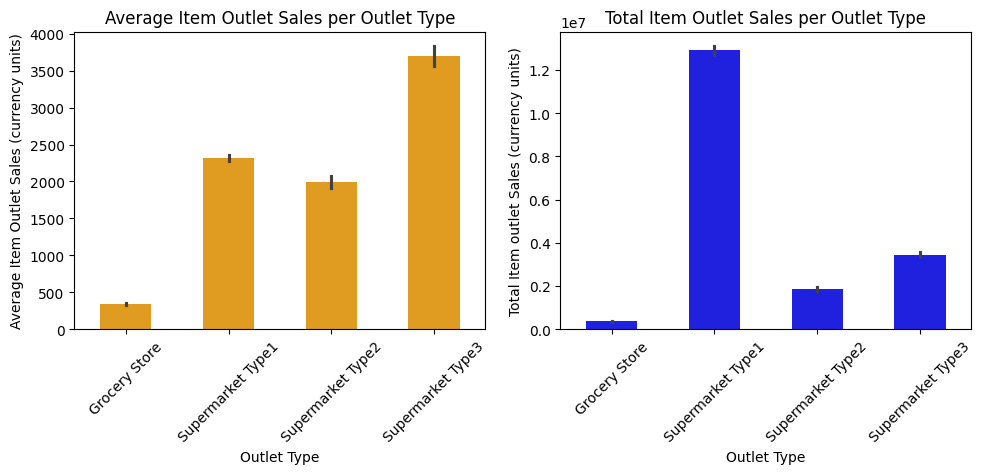

In [399]:
# Create a barplot of the total and average item outlet sales amount in stores per outlet type
fig, axes5 = plt.subplots(ncols = 2, figsize = (10, 5));

#Subplot 1
sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', color = 'orange', width = 0.5, order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'], ax = axes5[0])
axes5[0].set_xticklabels(axes5[0].get_xticklabels(), rotation=45);
axes5[0].set(title = 'Average Item Outlet Sales per Outlet Type', xlabel = 'Outlet Type', ylabel = 'Average Item Outlet Sales (currency units)');

#Subplot 2
sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', estimator = 'sum', color = 'blue', width = 0.5, order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'], ax = axes5[1])
axes5[1].set_xticklabels(axes5[1].get_xticklabels(), rotation=45);
axes5[1].set(title = 'Total Item Outlet Sales per Outlet Type', xlabel = 'Outlet Type', ylabel = 'Total Item outlet Sales (currency units)');

## Adjusting subplots to best fill Figure
fig.tight_layout()

<ipython-input-400-c713384c0119>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes6[0].set_xticklabels(axes6[0].get_xticklabels(), rotation=45, ha='right');
<ipython-input-400-c713384c0119>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes6[1].set_xticklabels(axes6[1].get_xticklabels(), rotation=45, ha='right');


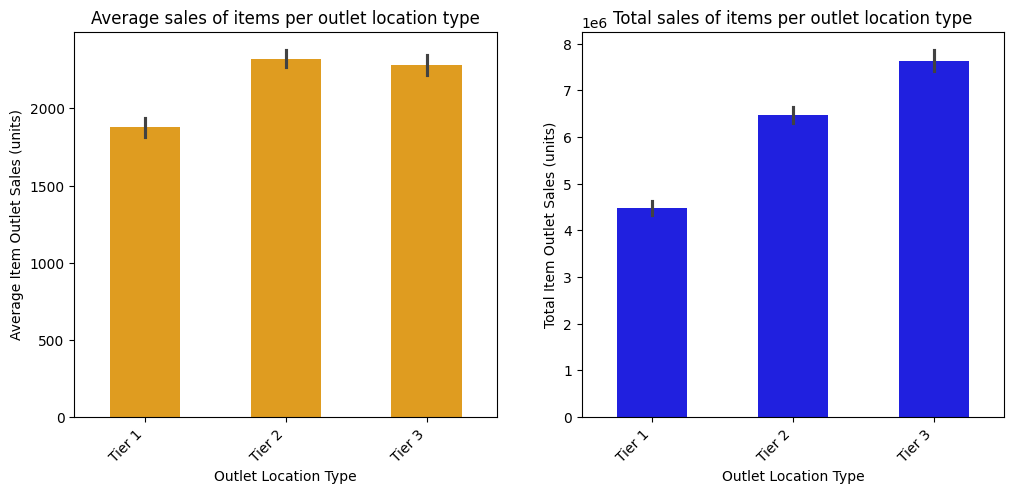

In [400]:
# Create a barplot of the average amount of items sold in stores per
fig, axes6 = plt.subplots(ncols = 2, figsize = (12, 5));

# Subplot 1
sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', ax = axes6[0], color = 'orange', width = 0.5, order = ['Tier 1', 'Tier 2', 'Tier 3']);
axes6[0].set_xticklabels(axes6[0].get_xticklabels(), rotation=45, ha='right');
axes6[0].set(title = 'Average sales of items per outlet location type', xlabel = 'Outlet Location Type', ylabel = 'Average Item Outlet Sales (units)');

# Subplot 2
sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', ax = axes6[1], estimator = 'sum', color = 'blue', width = 0.5, order = ['Tier 1', 'Tier 2', 'Tier 3'])
axes6[1].set_xticklabels(axes6[1].get_xticklabels(), rotation=45, ha='right');
axes6[1].set(title = 'Total sales of items per outlet location type', xlabel = 'Outlet Location Type', ylabel = 'Total Item Outlet Sales (units)');

Observations:

* Supermarket Type 3 earned the highest average sales, but Supermarket Type 1 got the highest total item outlet sales. This is because Supermarket Type 1 has more Item_Outlet_Sales records compared to Type 3. Grocery stores earned the lowest, which may be due to its relatively smaller size and limited stocks of items.
* Stores in tier 2 and 3 locations have notably higher total and average item outlet sales compared to that of tier 1 locations, hinting that Tier 1 locations may have fewer customers, low customer patronage, or small purchases per item.

#### Number of items sold per item type

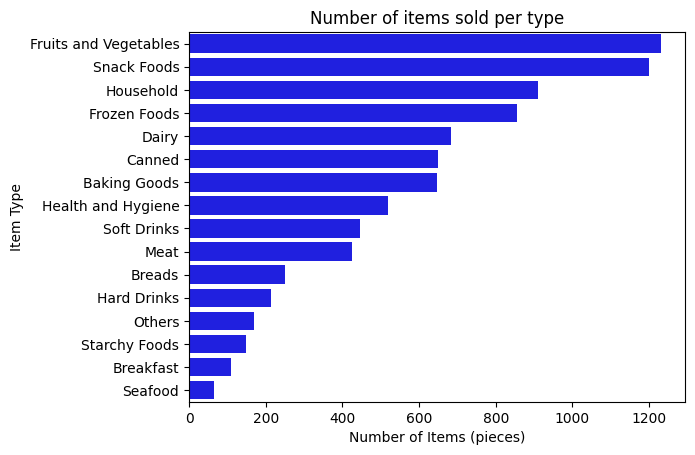

In [401]:
# Create a countplot of the total number of items available in the stores per item type
order1 = df['Item_Type'].value_counts().index;
ax6 = sns.countplot(data = df, y = 'Item_Type', color = 'blue', order = order1)
ax6.set(title = 'Number of items sold per type', ylabel = 'Item Type', xlabel = 'Number of Items (pieces)');

One can check the top items being sold in each individual outlet store types, as follows:

(a) Top items in grocery stores

In [402]:
# Check the top items sold in grocery stores
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Grocery Store']

Item_Type
Fruits and Vegetables    152
Snack Foods              146
Household                119
Frozen Foods             103
Dairy                     92
Baking Goods              85
Canned                    73
Health and Hygiene        67
Meat                      66
Soft Drinks               54
Breads                    33
Others                    27
Hard Drinks               24
Breakfast                 19
Starchy Foods             13
Seafood                   10
Name: Item_Type, dtype: int64

(b) Top items in type 1 supermarkets

In [403]:
# Check the top items sold in type 1 supermarkets
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Supermarket Type1']

Item_Type
Fruits and Vegetables    805
Snack Foods              785
Household                597
Frozen Foods             572
Dairy                    450
Baking Goods             426
Canned                   426
Health and Hygiene       335
Soft Drinks              300
Meat                     257
Breads                   160
Hard Drinks              145
Others                   107
Starchy Foods            104
Breakfast                 68
Seafood                   40
Name: Item_Type, dtype: int64

(c) Top items in type 2 supermarkets

In [404]:
# Check the top items sold in type 2 supermarkets
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Supermarket Type2']

Item_Type
Fruits and Vegetables    135
Snack Foods              132
Household                 95
Frozen Foods              92
Canned                    78
Dairy                     73
Baking Goods              68
Health and Hygiene        58
Meat                      46
Soft Drinks               46
Breads                    27
Hard Drinks               22
Others                    20
Starchy Foods             17
Breakfast                 12
Seafood                    7
Name: Item_Type, dtype: int64

(d) Top items in type 3 supermarkets

In [405]:
# Check the top items sold in type 3 supermarkets
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Supermarket Type3']

Item_Type
Fruits and Vegetables    140
Snack Foods              137
Household                 99
Frozen Foods              89
Canned                    72
Baking Goods              69
Dairy                     67
Health and Hygiene        60
Meat                      56
Soft Drinks               45
Breads                    31
Hard Drinks               23
Others                    15
Starchy Foods             14
Breakfast                 11
Seafood                    7
Name: Item_Type, dtype: int64

Observations:
* Fruits and vegetables are the abundant items sold in all stores, followed by snack foods and household items.
* This trend is consistent in all store types: groceries and supermarkets of all types.

### Feature Inspection

The features to be inspected are the following:
* Item_Weight
* Item_Fat_Content
* Item_Visibility
* Item_Type
* Item_MRP
* Outlet_Establishment_Year
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

The following categorical features were not inspected. These are identifiers and not characteristics of products or outlets that are relevant to influence the item outlet sales (target). Moreover, some of these have thousands of unique categories, which may not be helpful in the machine learning modelling later:
* Item_Identifier
* Outlet_Identifier

#### Create EDA functions to automate generation of feature inspection graphs.

In [406]:
# Define explore_categorical function

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [407]:
# Define explore_numeric function

def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()

  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [408]:
# Define plot_categorical_vs_target function

def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [409]:
# Define plot_numeric_vs_target function

def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

#### Replace the placeholders set earlier in the Data Cleaning section into NaN

* Placeholders in the 'Item_Weight' feature

In [410]:
# Confirm the placeholders in the 'Item Weight' feature
df['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [411]:
# Replace placeholder '-1' with 'NaN'
df['Item_Weight'] = df['Item_Weight'].replace(-1.0, np.nan)
# Confirm that the placeholders in the 'Item Weight' feature are replaced with 'NaN'
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

* Placeholders in the 'Outlet_Size' feature

In [412]:
# Confirm the placeholders in the 'Outlet_Size' feature
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

In [413]:
# Replace placeholder 'MISSING' with 'NaN'
df['Outlet_Size'] = df['Outlet_Size'].replace('MISSING', np.nan)
# Confirm that the placeholders in the 'Outlet_Size' feature is replaced with 'NaN'
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [414]:
# Check the number of null values for all columns
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Inspecting: Item_Weight

- Item_Weight: Weight of the product
  

In [415]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

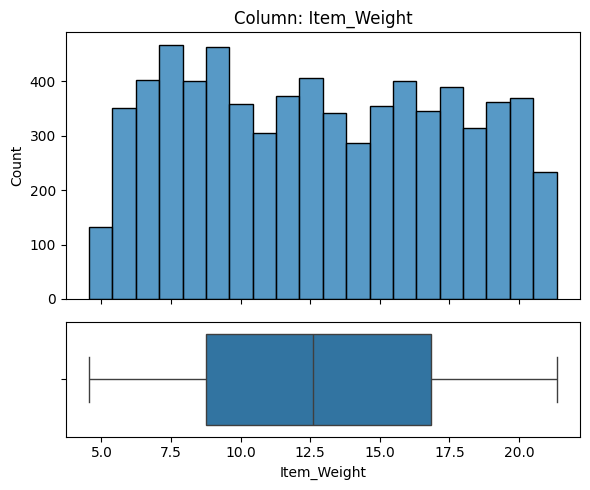

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [416]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `numeric`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are 1463 null values, which is 17.17% out of the total number of values. The null values may be randomly missed. For these missing values, it might be better to impute them with the mean of all other entries under this feature.`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `Not applicable since this is a numeric feature.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `The weight of the product should not affect the consumers' preference as there are several means to carry the product once purchased.`



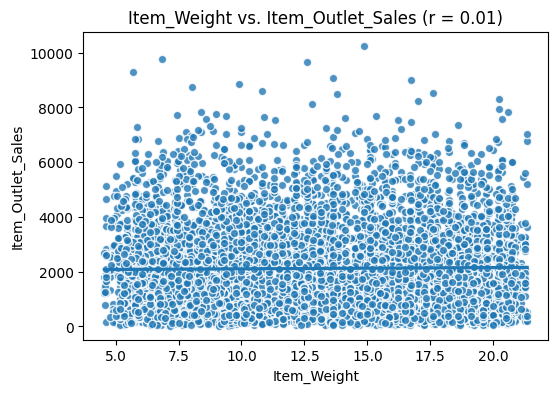

In [417]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Most likely not. The weight of the product should not affect the consumers' preference as there are several means to carry the product once purchased.`
  - Does this feature appear to be a predictor of the target?
    - `Probably not. As seen from the above plot, there is almost zero correlation (0.01) between this feature and the target` ?

___

#### Inspecting: Item_Fat_Content

- Item_Fat_Content: Whether the product is low-fat or regular
  

In [418]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-406-4297d98bdc46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


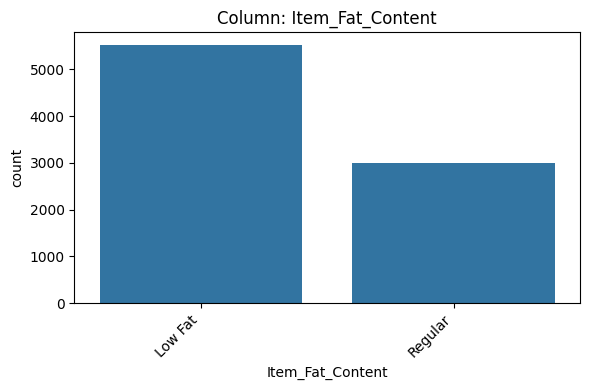

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [419]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `categorical (nominal)`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are no null values.`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `The cardinality is low as there are only 2 unique values.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `This could be a factor if consumers are conscious of their fat intake. However, in general, this may not be a significant factor to item outlet sales.`



<ipython-input-408-be1869d54581>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


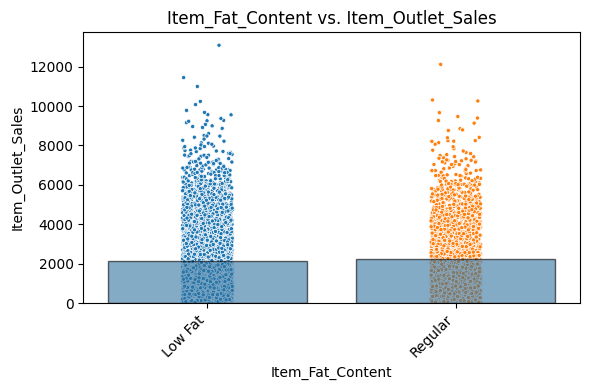

In [420]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `This could be a factor if consumers are conscious of their fat intake. However, in general, this may not be a significant factor to item outlet sales`
  - Does this feature appear to be a predictor of the target?
    - `Probably not. As seen from the above plot, there is no clear distinction, in terms of item outlet sales, between the 'low fat' and 'regular' fat content products. Moreover, there are also overlaps in the item outlet sales values between the two categories.`

___

#### Inspecting: Item_Visibility

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product
  

In [421]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

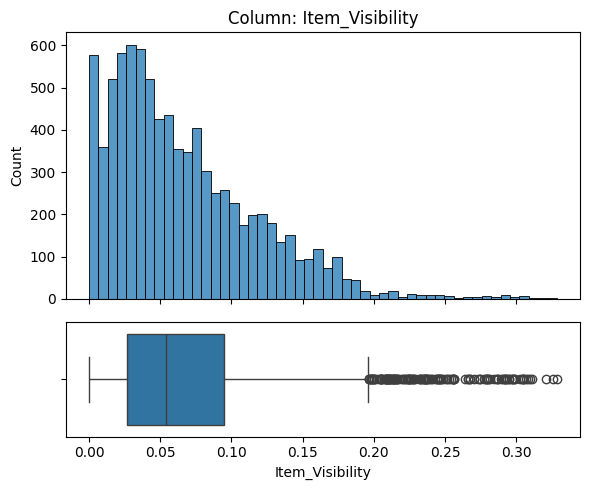

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [422]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `numeric`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are no null values`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `Not applicable since this is a numeric feature.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `None. The item visibility could be helpful in predicting the item outlet sales since a higher visibility boosts the popularity of the product to the consumers, resulting to higher item outlet sales.`



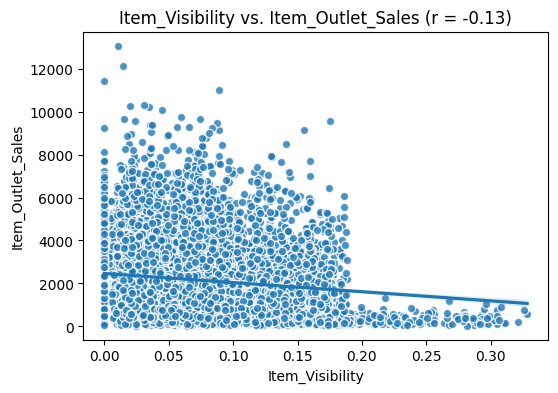

In [423]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `The item visibility could be helpful in predicting the item outlet sales since a higher visibility boosts the popularity of the product to the consumers, resulting to higher item outlet sales.`
  - Does this feature appear to be a predictor of the target?
    - `Probably not. As seen from the above plot, there is almost zero correlation (0.01) between this feature and the target` ?

___

#### Inspecting: Item_Type

- Item_Type: The category to which the product belongs
  

In [424]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-406-4297d98bdc46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


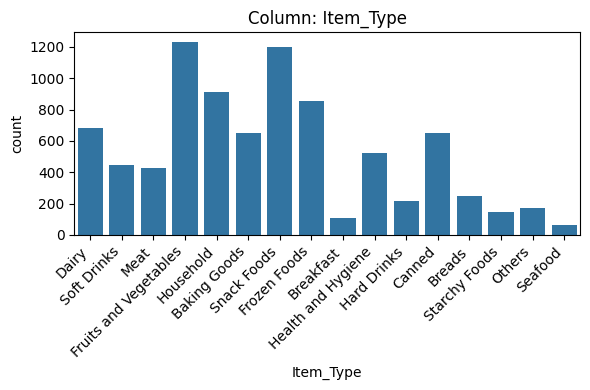

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [425]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `categorical (nominal)`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are no null values.`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `The cardinality is moderately high as there are 16 unique values.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `Item type may not be a considerable factor in predicting the outlet sales as almost all item types are necessary for general consumers.`



<ipython-input-408-be1869d54581>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


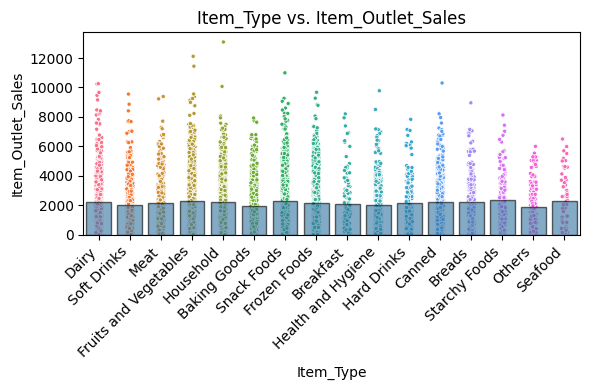

In [426]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Probably not. Item type may not be a considerable factor in predicting the outlet sales as almost all item types are necessary for general consumers.`
  - Does this feature appear to be a predictor of the target?
    - `Probably not. As seen from the above plot, there is no clear distinction, in terms of item outlet sales, among the item type categories. Moreover, there are also overlaps in the item outlet sales values among the categories.`

___

#### Inspecting: Item_MRP

- Item_MRP: Maximum Retail Price (list price) of the product
  

In [427]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

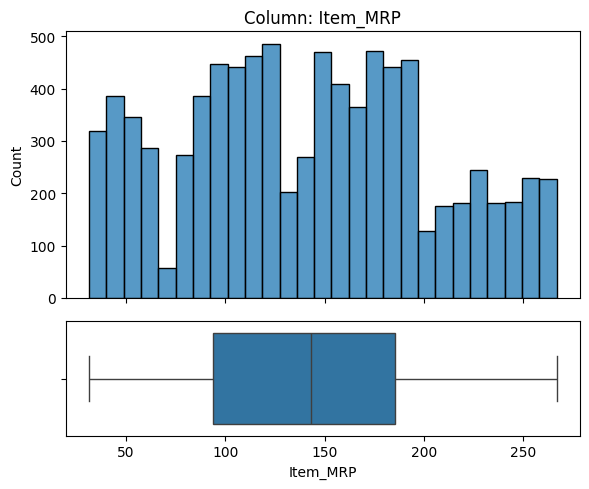

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [428]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `numeric`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are no null values`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `Not applicable since this is a numeric feature.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `None. The item MRP could be helpful in predicting the item outlet sales as the item price may be a factor for consumers to buy lower-priced items instead, resulting to a lower item outlet sales.`



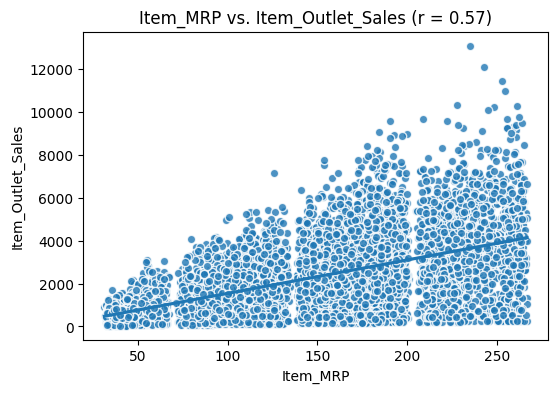

In [429]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `The item MRP could be helpful in predicting the item outlet sales as the item price may be a factor for consumers to buy lower-priced items instead, resulting to a lower item outlet sales.`
  - Does this feature appear to be a predictor of the target?
    - `Probably yes. As seen from the above plot, there is a moderate correlation (0.57) between this feature and the target`

___

#### Inspecting: Outlet_Establishment_Year

- Outlet_Establishment_Year: The year in which store was established
  

In [430]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

string[python]

<ipython-input-406-4297d98bdc46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


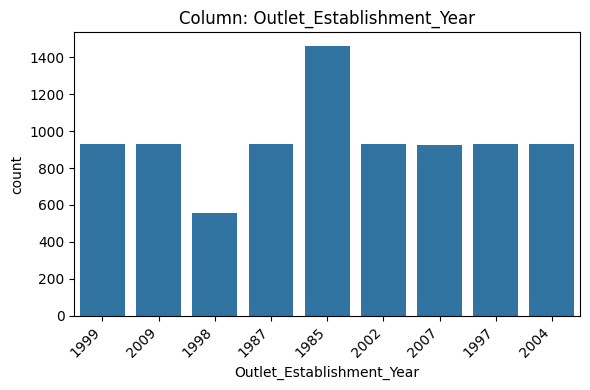

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [431]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `categorical (ordinal)`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are no null values.`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `The cardinality is low as there are only 9 unique values.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `None. Outlet establishment year could be a factor for a consumer in choosing the outlet that they want to buy items in.`



<ipython-input-408-be1869d54581>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


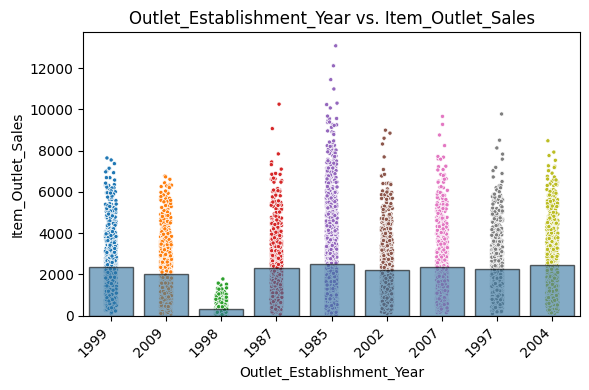

In [432]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Probably yes. Outlet establishment year could be a factor for a consumer in choosing the outlet that they want to buy items in.`
  - Does this feature appear to be a predictor of the target?
    - `Probably not. As seen from the above plot, with the exception of '1998', there is no clear distinction, in terms of item outlet sales, among the categories. Moreover, there are also overlaps in the item outlet sales values among the categories.`

___

#### Inspecting: Outlet_Size

- Outlet_Size: The size of the store in terms of ground area covered
  

In [433]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-406-4297d98bdc46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


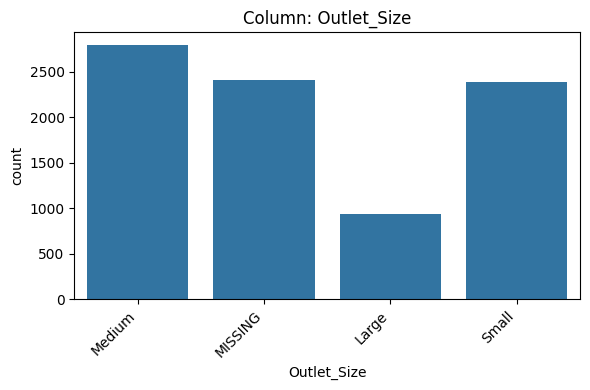

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [434]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `categorical (ordinal)`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are 2410 null values. The null values can be imputed with 'MISSING'.`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `The cardinality is low as there are only 4 unique values (including MISSING).`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `None. Outlet Size may influence Outlet Item Sales as larger outlet size may result to more available items displayed in the store.`



<ipython-input-408-be1869d54581>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


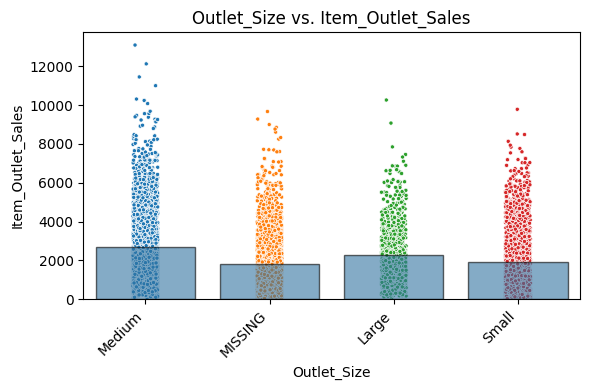

In [435]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Probably yes. Outlet size may influence outlet item sales as larger outlet size may result to more available items displayed in the store.`
  - Does this feature appear to be a predictor of the target?
    - `Probably not. Although the mean item outlet sales of each category differs slightly, the item outlet sales values among the categories overlap.`

___

#### Inspecting: Outlet_Location_Type

- Outlet_Location_Type: The type of area in which the store is located
  

In [436]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-406-4297d98bdc46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


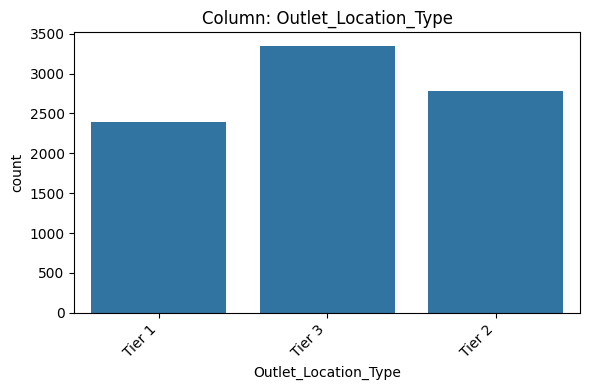

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [437]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `categorical (ordinal)`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are no null values.`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `The cardinality is low as there are only 3 unique values.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `None. Outlet location type may influence outlet item sales as each location type probably consist of unique group of consumers, with one group possibly being more of a frequent buyer, than the others.`



<ipython-input-408-be1869d54581>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


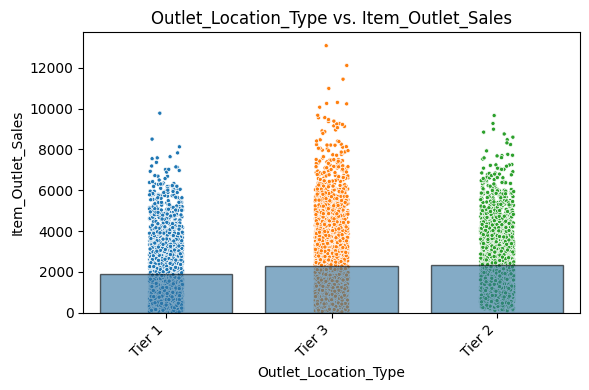

In [438]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Probably yes. Outlet location type may influence outlet item sales as each location type probably consist of unique group of consumers, with one group possibly being more of a frequent buyer, than the others.`
  - Does this feature appear to be a predictor of the target?
    - `Probably not. Although the mean item outlet sales of each category differs slightly, the item outlet sales values among the categories overlap.`

___

Whether the outlet is a grocery store or some sort of supermarket

#### Inspecting: Outlet_Type

- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket
  

In [439]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

<ipython-input-406-4297d98bdc46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


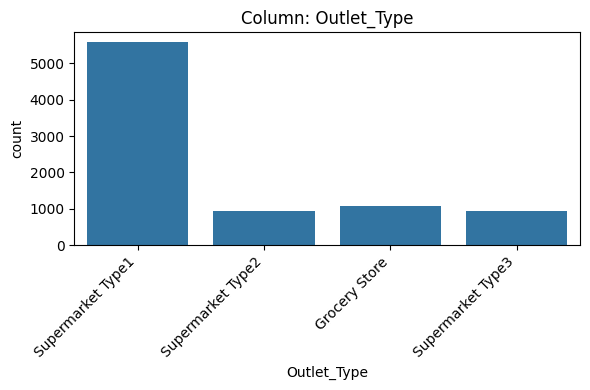

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [440]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `categorical (nominal)`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `There are no null values.`

3. Is the feature constant or quasi-constant?
  - `The feature is not constant nor quasi-constant.`

4. What is the cardinality? Is it high?
  - `The cardinality is low as there are only 4 unique values.`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `None. Outlet type may influence outlet item sales as each outlet type caters to unique group of consumers, with one group possibly being more of a frequent buyer, than the others.`



<ipython-input-408-be1869d54581>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


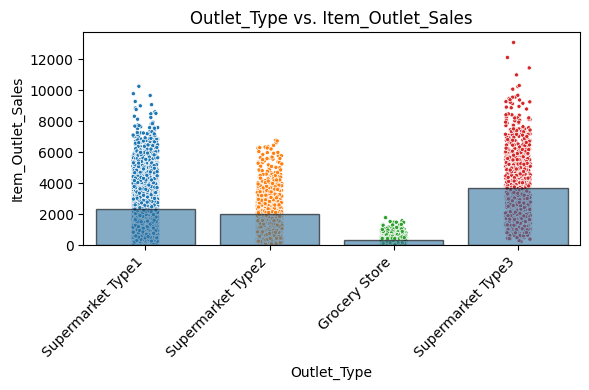

In [441]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, x = feature, y = 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Probably yes. Outlet location type may influence outlet item sales as each location type probably consist of unique group of consumers, with one group possibly being more of a frequent buyer, than the others.`
  - Does this feature appear to be a predictor of the target?
    - `Probably yes. The mean item outlet sales of each category differs slightly; however, the item outlet sales values among the categories overlap.`

___

#### Summary: Feature Inspection

- Among all features, ***Item_MRP*** and ***Outlet_Type*** can be candidate predictors of the target (Outlet_Item_Sales).
- ***Item_MRP***, a numeric feature, has moderate correlation with the target variable.
- ***Outlet_Type***, a categorical feature, has distinguishable mean value of the item outlet sales (target variable) among its categories, which may be useful in the training of the machine learning predictive modelling of the target later.

## Part 2: Predicting the Product Sales

### Define functions for modelling, visualization, and importance determination

In [442]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [443]:
# Define function get_importance that gets the importance of each feature in the dataset
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [444]:
# Define plot_importance that plots the importance of each feature in the dataset
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [445]:
# Defines a function to creates a color dictionary for the specified top N features if importance
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [446]:
# Defines a function that plots the importance array with colors on the top N features
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax


In [447]:
# Defines another function that also plots the importance array with colors on the top N features, but returns ax so that the figure can be updated
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax


In [448]:
# Get regression coefficients
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [449]:
# Define the annotate_hbars function
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)


In [450]:
# Define function that plots the regression coefficients
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

### Reload the dataset





In [451]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing functions
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set options
pd.set_option('display.max_columns',100)
from sklearn import set_config
# set_config(display='diagram')
# Change settings to ouput a dataframe
set_config(transform_output='pandas')

In [452]:
# Save the url of the dataset file into the variable 'url'
url = "https://docs.google.com/spreadsheets/d/1Zj82l4J1kS8rkFu95Q3F0L2XymcqM75aSIDxtdLQnNo/edit#gid=1119319421"

# Change the format of the url into an export url and save it to variable 'csv_url'
# Source: https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
csv_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

# Download the dataset in csv format and save to pandas dataframe, df.
df = pd.read_csv(csv_url)

In [453]:
# Define a function that takes true and predicted values as arguments
# and prints all 4 metrics

def eval_model(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

### Data Preparation

###### (1) Fix data types

In [454]:
# Change the datatype of Outlet_Establishment_Year column to object
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('string')
# Confirm the datatype
df['Outlet_Establishment_Year'].dtype

string[python]

###### (2) Check for duplicated rows


In [455]:
# Identify the duplicated rows and find their total number
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

>> SUMMARY:

>> No duplicate rows present in the dataframe

###### (3) Check Unique Identifiers

In [456]:
# Find the numnber of unique values per column/feature
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [457]:
# Find the percentage of unique values per column/feature
df.nunique()/len(df) *100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

>> SUMMARY:

>> No valid unique identifier can be set as an index

###### (4) Identify Missing Values

In [458]:
# Get the number of null values for all columns
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [459]:
#  Get the percentage of null values for all columns
null_sums/len(df) *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

>> SUMMARY:

>> Missing values will be imputed later after the train-test-split step.

###### (5) Check and Fix Consistency

In [460]:
# Save a list of string columns
obj_columns = df.select_dtypes(['object', 'string']).columns

# Check the # of unique values for the string columns
df[obj_columns].nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

>> Note: Will not check the Item_identifier for consistency since it is not possible to know if the identifier is indeed consistent due to its many possible values.

In [461]:
# Save to a variable the list of all the columns that will be checked for consistency
obj_columns = df.select_dtypes(['object', 'string']).drop(columns = 'Item_Identifier').columns

In [462]:
# loop through the list of string columns to check for value consistency
for col in obj_columns:
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: Int64


Medium    2793
Small    

>> Note: For the ***Item_Fat_Content*** column, the values should only be either 'Low Fat' or 'Regular'. Meanwhile, for the ***Outlet_Size*** column, values should either be Small, Medium, or Large.

In [463]:
# Replace miscoded entries in the Item_Fat_Content column with the expected values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [464]:
# Replace miscoded entries in the Outlet_Size column with the expected values
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
# Check the value counts again to confirm
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

>> SUMMARY:

>> The dataframe was checked for consistency. Certain columns are fixed to make their values consistent with the expectation.

###### (6) Drop unnecessary features

> - The Item_identifier and Outlet_Identifier features were omitted as they are not characteristics of products or outlets that are relevant to influence the item outlet sales (target). Moreover, the Item_Identifier has thousands of unique categories, which may not be helpful in the machine learning modelling later.

In [465]:
df = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier'])
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##### Train Test Split

In [466]:
# Determine features matrix (X) and target vector (y)
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

In [467]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Create Pre-process Column Transformer

- Pre-processing involves imputation of missing values, encoding of categorical features, and scaling of all features prior to modelling.

In [468]:
# Create lists of features according to feature types
num_cols = list(X_train.select_dtypes('number').columns)
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']
nom_cols = list(X_train.select_dtypes(['object', 'string']).drop(columns = ord_cols).columns)

In [469]:
# Create transformations for numerical features
imputer_num = SimpleImputer(strategy = 'median')
scaler_num = StandardScaler()

# Create transformations for nominal features
# Note: No imputer transformation for nominal features since no nominal feature has missing values
ohe_nom = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create transformations for ordinal features
imputer_ord = SimpleImputer(strategy = 'most_frequent')

OutletSize_cat_order = ['Small', 'Medium', 'Large']
OutletType_cat_order = ['Tier 1', 'Tier 2', 'Tier 3']
ordinal_cat_order = [OutletSize_cat_order, OutletType_cat_order]

oe_ord = OrdinalEncoder(categories = ordinal_cat_order)
scaler_ord = StandardScaler()

In [470]:
# Create pipelines
num_pipe = make_pipeline(imputer_num, scaler_num)
nom_pipe = make_pipeline(ohe_nom)
ord_pipe = make_pipeline(imputer_ord, oe_ord, scaler_ord)

In [471]:
# Create tuples
tuple_num = ('numeric', num_pipe, num_cols)
tuple_nom = ('nominal', nom_pipe, nom_cols)
tuple_ord = ('ordinal', ord_pipe, ord_cols)

In [472]:
# Create column transformer
preprocess = ColumnTransformer([tuple_num, tuple_nom, tuple_ord], remainder = 'passthrough')
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility',
                                  'Item_MRP']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Establishment_Year', 'Outlet_Type']),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type'])])

### Model 1: Linear Regression Model and its Evaluation

In [473]:
# Instantiate a linear regression model
lr = LinearRegression()

# Combine the preprocessor object and the linear regression model in a pipeline
lr_pipe = make_pipeline(preprocess, lr)

# fit your pipe on the training data
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output...
                                                   'Outlet_Establishment_Year',
                                                   'Outlet_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])])),
                ('linearregression', LinearRegression())])

In [474]:
# find MAE, MSE, RMSE and R2 on the linear regression model for both the train and test data
print('Training Evaluation')
eval_model(y_train, lr_pipe.predict(X_train))

print('\n')

print('Testing Evaluation')
eval_model(y_test, lr_pipe.predict(X_test))

Training Evaluation
MAE 847.1282046307886,
 MSE 1297557.4726699663,
 RMSE: 1139.103802412215,
 R^2: 0.5615553661825987 


Testing Evaluation
MAE 804.1193070154856,
 MSE 1194349.5050094333,
 RMSE: 1092.862985469557,
 R^2: 0.5671042634936212 


---

*** Interpret the regression coefficients ***

In [475]:
# Redefine the preprocessing transformer by removing the scalers and redefining the OHE

# Create transformations for nominal features
# Note: No imputer transformation for nominal features since no nominal feature has missing values
ohe_nom = OneHotEncoder(sparse_output=False, drop='first')

# Create pipelines
num_pipe = make_pipeline(imputer_num)
nom_pipe = make_pipeline(ohe_nom)
ord_pipe = make_pipeline(imputer_ord, oe_ord)

# Create tuples
tuple_num = ('numeric', num_pipe, num_cols)
tuple_nom = ('nominal', nom_pipe, nom_cols)
tuple_ord = ('ordinal', ord_pipe, ord_cols)

# Create column transformer
preprocess = ColumnTransformer([tuple_num, tuple_nom, tuple_ord], remainder = 'passthrough')

# fit column transformer and run get_feature_names_out
preprocess.fit(X_train)
feature_names = preprocess.get_feature_names_out()
X_train_pr = preprocess.transform(X_train)
X_test_pr = preprocess.transform(X_test)

In [476]:
# Redefine the model
lr = LinearRegression()

# Fit
lr.fit(X_train_pr,y_train)

LinearRegression()

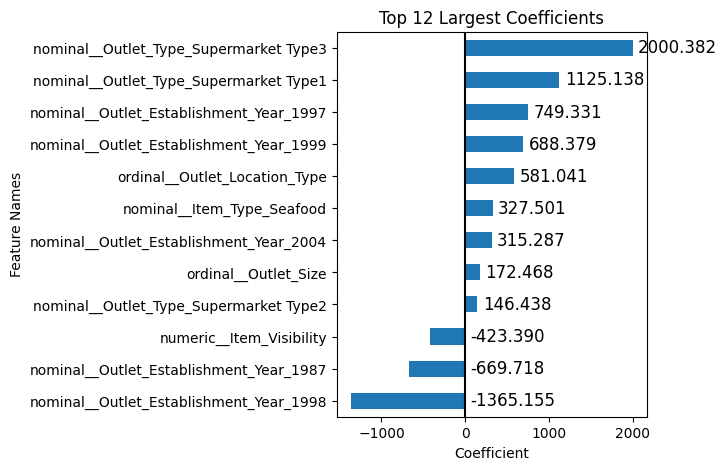

In [477]:
# Check, plot, and interpret the coefficients of the linear regression model
coeffs = get_coeffs_linreg(lr)
plot_coeffs(coeffs,top_n=12,annotate=True);

Interpretation of Coefficients:
- As the data suggests, the following can be interpreted:
- The feature with the largest impact on the target ('Item_Outlet_Sales') is 'nominal_Outlet_Type_Supermarket Type 3'. This means that when the outlet type is a Supermarket Type 3, the item outlet sales may go up by around 2000 currency units.
- It also seem that 'item_Visibility' does not help as a higher visibility may cause the 'Item_Outlet_Sales' to go down by ~423 currency units.
- Another notable feature is the 'Outlet_Size'. A one step upgrade of the outlet size, e.g. from Medium to Large, may increase the sales by ~172 currency units.

---

Notes on the model:
* The linear regression model is underfit with the dataset and is not applicable for deployment. This is evident with the low R^2 of the model with the data.
* Consider using a different model.

### Model 2: Random Forest Model and its Evaluation

In [478]:
# Instantiate a random forest regression model
rf = RandomForestRegressor()

# Make a process pipeline of the pre-processor and the model
rf_pipe = make_pipeline(preprocess, rf)

# Fit your pipe on the training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Establishment_Year',
                                                   'Outlet_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [479]:
# Find MAE, MSE, RMSE and R2 on the bagging tree regression model for both the train and test data
print('Train Evaluation')
eval_model(y_train, rf_pipe.predict(X_train))

print('\n')

print('Test Evaluation')
eval_model(y_test, rf_pipe.predict(X_test))

Train Evaluation
MAE 299.47857116332915,
 MSE 186714.45389861809,
 RMSE: 432.1046793296945,
 R^2: 0.9369091912364041 


Test Evaluation
MAE 773.6594312848428,
 MSE 1243322.3394177502,
 RMSE: 1115.0436491087469,
 R^2: 0.549353905553107 


---

*** Interpret the feature importances ***

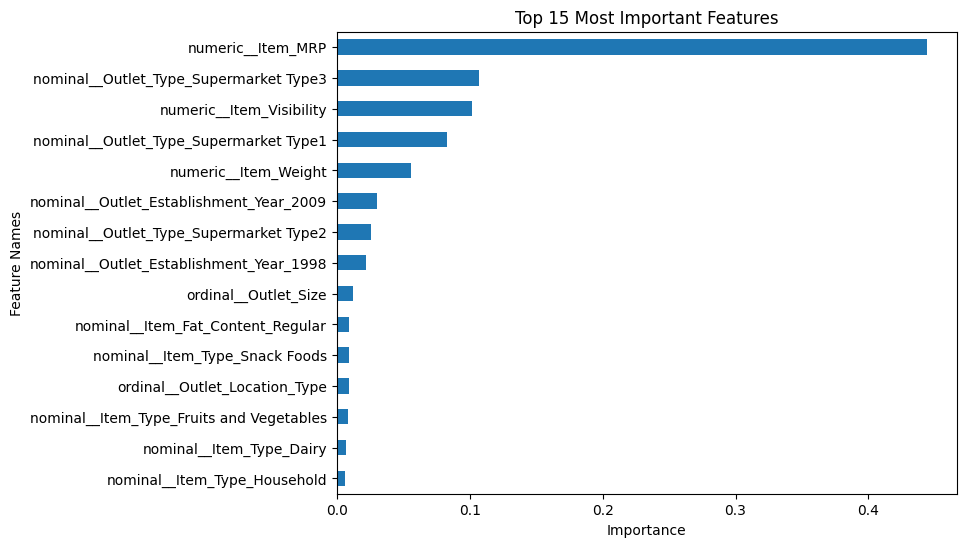

In [480]:
# Get the feature importances
importances = get_importances(rf, sort=True, ascending=False)

# Plot the feature importances
plot_importance(importances, top_n=15);

Interpretation of Importances:
- As the data suggests, the following can be interpreted:
- The feature 'Item_MRP' is the most utilized feature of the model, thus is the most important. This may be expected since earlier Exloratory Data Analysis (EDA) shows that this feature is somewhat correlated to the target ('Item_Outlet_Sales').
- 'Supermarket Type 3' and 'Supermarket Type 1' also made it into the list, which may imply that specific types of supermarkets are significant contributors as decision factors of the model.
- It can be noted that Supermarket Type 3', 'Item_Visibility', and 'Supermarket Type 1' are features that also appear in the previously discussed linear regression model that have considerable coefficient values, and thus affects the target variable considerably in the said model.

---

Notes on the model:
* The random forest regression model has high variance (overfit) and is not suitable for deployment.  
* Moreover, the linear regression model created earlier even has higher R^2 compared to this random forest model.
* The random forest model needs optimization.

### Model 3: Tuned Random Forest Model and its Evaluation

**Hyperparameter Tuning on the Random Forest Model**

In [481]:
# Get params
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median'))]),
                                    ['Item_Weight', 'Item_Visibility',
                                     'Item_MRP']),
                                   ('nominal',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(drop='first',
                                                                   sparse_output=False))]),
                                    ['Item_Fat_Content', 'Item_Type',
                                     'Outlet_Establishment_Year', 'Outlet_Type']),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
               

In [482]:
# Create parameters grid
param_grid = {
    'randomforestregressor__max_depth': [None,10,15,20],
    'randomforestregressor__n_estimators':[10,100,150],
    'randomforestregressor__min_samples_leaf':[2,3,4]
}

In [483]:
# Create GridSearchCV
grid_search = GridSearchCV(rf_pipe, param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [484]:
# Fit the GridSearchCV onto the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Item_Weight',
                                                                          'Item_Visibility',
                                                                          'Item_MRP']),
                                                                        ('nominal',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Item_F...
                                                                                          OrdinalEncoder(categories=[['Small',
                                                                                                                      'Medium',
                                                                                                                      'Large'],
                                                                                                                     ['Tier '
                                                                                                                      '1',
                                                                                                                      'Tier '
                                                                                                                      '2',
                                                                                                                      'Tier '
                                                                                                                      '3']]))]),
                                                                         ['Outlet_Size',
                                                                          'Outlet_Location_Type'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150]},
             verbose=1)

In [485]:
# Get the best parameters
grid_search.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__n_estimators': 150}

In [486]:
# Get the best model
best_rf_model = grid_search.best_estimator_
best_rf_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Out...
                                                   'Outlet_Type']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       n_estimators=150))])

In [487]:
# Evaluate the random forest regressor model
# Find MAE, MSE, RMSE and R2 on the random forest regression model for both the train and test data
print('Train Evaluation')
eval_model(y_train, best_rf_model.predict(X_train))

print('\n')

print('Test Evaluation')
eval_model(y_test, best_rf_model.predict(X_test))

Train Evaluation
MAE 646.0122128484177,
 MSE 850864.7536804121,
 RMSE: 922.4233050397264,
 R^2: 0.7124928234678445 


Test Evaluation
MAE 737.9338997573269,
 MSE 1122390.1931463552,
 RMSE: 1059.429182695264,
 R^2: 0.5931861425221667 


Notes on the model:
- The new random forest model with tuned parameters improved and showed lower variance than the one with the default parameters.
- However, the model is still underfit.
- One of the possible solutions is to add more entries to the dataset by updating the dataset with fresh entries. Another is by selecting a new model.

### ***Choosing the best model for prediction***

- In choosing the best model, one may refer to the metrics R^2, MAE, MSE, and RMSE.
- R^2 describes how well the model predicts the target variable (Item_Outlet_Sales). Hence, a higher R^2 is thought to be better. This, however, does not totally claim any cause-effect relationship between correlated variables.
- Looking at the R^2 of the testing data of all the models featured above, the tuned random forest model is slightly better with ~0.60.
- The R^2 of this model is still low, though, suggesting that a better model, other than the 3 that were used here, may be employed.
- The RMSE may also be checked as it gives more penalty on large errors. The RMSE of the testing data of the tuned random forest model prevailed among the 3 featured models above.
- Hence, given these 3 models above, the best one to deploy is the ***Tuned Random Forest Model***. But then, a better model, other than the 3 used here, can be employed to increase the reliability of the predicted results.